In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("combined_data_clear_finale.csv")
df.head()

,age,covid_status,gender,smoker,cold,hypertention,diabetes,cough,ct_scan,ct_score,...,testType,test_status,using_mask,vacc,bd,others_resp,fatigue,sore_throat,ihd,asthma
0,28,healthy,male,False,False,False,False,False,False,0.0,...,none,none,False,False,False,False,False,False,False,False
1,25,healthy,male,True,False,False,False,False,False,0.0,...,none,none,False,False,False,False,False,False,False,False
2,28,healthy,female,False,False,False,False,False,False,0.0,...,none,none,False,False,False,False,False,False,False,False
3,26,healthy,male,False,True,False,False,False,False,0.0,...,none,none,False,False,False,False,False,False,False,False
4,32,healthy,male,False,False,False,False,False,False,0.0,...,none,none,False,False,False,False,False,False,False,False


In [2]:
df.shape

(2233, 24)

In [3]:
# размерность данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            2233 non-null   int64  
 1   covid_status   2233 non-null   object 
 2   gender         2233 non-null   object 
 3   smoker         2233 non-null   bool   
 4   cold           2233 non-null   bool   
 5   hypertention   2233 non-null   bool   
 6   diabetes       2233 non-null   bool   
 7   cough          2233 non-null   bool   
 8   ct_scan        2233 non-null   bool   
 9   ct_score       2233 non-null   float64
 10  diarrhoea      2233 non-null   bool   
 11  fever          2233 non-null   bool   
 12  loss_of_smell  2233 non-null   bool   
 13  muscle_pain    2233 non-null   bool   
 14  testType       2233 non-null   object 
 15  test_status    2233 non-null   object 
 16  using_mask     2233 non-null   bool   
 17  vacc           2233 non-null   bool   
 18  bd      

In [4]:
# статистики count,mean, std, min, 25%-50%-75% percentile, max
df.describe()

,age,ct_score
count,2233.000000,2233.000000
mean,35.343036,0.283027
std,13.965415,1.642176
min,1.000000,0.000000
25%,25.000000,0.000000
50%,31.000000,0.000000
75%,44.000000,0.000000
max,90.000000,25.000000


In [5]:
# количество уникальных значений для каждого столбца
df.nunique

<bound method DataFrame.nunique of       age       covid_status  gender  smoker   cold  hypertention  diabetes  \
0      28            healthy    male   False  False         False     False   
1      25            healthy    male    True  False         False     False   
2      28            healthy  female   False  False         False     False   
3      26            healthy    male   False   True         False     False   
4      32            healthy    male   False  False         False     False   
...   ...                ...     ...     ...    ...           ...       ...   
2228   48     positive_asymp    male   False  False          True      True   
2229   36      positive_mild    male    True   True         False     False   
2230   76      positive_mild    male   False   True          True      True   
2231   25  positive_moderate    male   False   True         False     False   
2232   78      positive_mild  female   False  False          True      True   

      cough  ct_

In [6]:
# количество каждого уникального значения для каждого столбца
feature_names = df.columns.tolist ()
for column in feature_names:
    print (column)
    print (df[column].value_counts(dropna=False))

age
25    145
26    102
22     97
30     94
24     93
     ... 
80      1
77      1
10      1
85      1
87      1
Name: age, Length: 80, dtype: int64
covid_status
healthy                        1379
positive_mild                   261
no_resp_illness_exposed         174
resp_illness_not_identified     151
positive_moderate               118
recovered_full                   99
positive_asymp                   51
Name: covid_status, dtype: int64
gender
male      1579
female     653
other        1
Name: gender, dtype: int64
smoker
False    2069
True      164
Name: smoker, dtype: int64
cold
False    1942
True      291
Name: cold, dtype: int64
hypertention
False    2050
True      183
Name: hypertention, dtype: int64
diabetes
False    2042
True      191
Name: diabetes, dtype: int64
cough
False    1848
True      385
Name: cough, dtype: int64
ct_scan
False    2099
True      134
Name: ct_scan, dtype: int64
ct_score
0.0     2139
5.0       24
2.0       12
3.0        9
10.0       6
4.0        6
6.

In [7]:
# для нормальной классификации будем заменять стринг в инт
from sklearn import preprocessing 

df['covid_status'] = df['covid_status'].map({'healthy': 0, 
                               'positive_mild': 1, 
                               'positive_moderate': 2, 
                               'no_resp_illness_exposed': 3,
                               'recovered_full': 4,
                               'resp_illness_not_identified': 5,
                               'positive_asymp': 6}) 


label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['covid_status']) 
label_encoder.transform(df['covid_status'])

df['covid_status'].value_counts(dropna=False)

0    1379
1     261
3     174
5     151
2     118
4      99
6      51
Name: covid_status, dtype: int64

In [8]:
from sklearn import preprocessing

df['gender'] = df['gender'].map({'male': 0, 
                               'female': 1,
                                'other': 2}) 


label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['gender']) 
label_encoder.transform(df['gender'])

df['gender'].value_counts(dropna=False)

0    1579
1     653
2       1
Name: gender, dtype: int64

In [9]:
# для нормальной классификации будем заменять стринг в инт
from sklearn import preprocessing
df['testType'] = df['testType'].map({'none': 0, 
                               'rtpcr': 1, 
                               'rat': 2,
                               'False': 0}) 


label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['testType']) 
label_encoder.transform(df['testType'])

df['testType'].value_counts(dropna=False)

0    1860
1     371
2       2
Name: testType, dtype: int64

In [10]:
# для нормальной классификации будем заменять стринг в инт
from sklearn import preprocessing
df['test_status'] = df['test_status'].map({'none': 0, 
                               'positive': 1, 
                               'n': 2,
                                'na': 3}) 


label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['test_status']) 
label_encoder.transform(df['test_status'])

df['test_status'].value_counts(dropna=False)

0    1413
1     389
3     231
2     200
Name: test_status, dtype: int64

In [11]:
# целевая переменная
features = df.drop('covid_status', 1) 
labels = df['covid_status'] 

In [12]:
# обработка пропусков в данных (среднее)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean') 
imputer.fit(features)  
features = imputer.transform(features) 


C:\Users\M005E\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


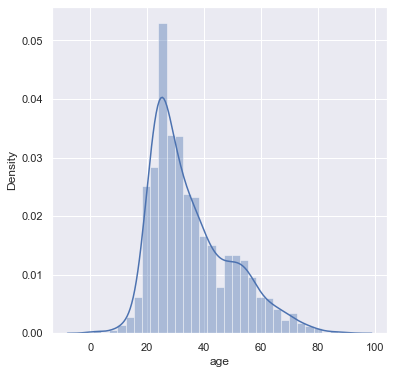

In [13]:
# возраст тестируемых
%matplotlib inline   
import seaborn as sns 
sns.set(color_codes=True) 
plot = sns.distplot(df.age.dropna()) 
plot.figure.set_size_inches(6,6) 


In [68]:
# нормализация (имеет смысл нормализовать только возраст и КТ-оценку?)

# Feature scaling with StandardScaler 
from sklearn.preprocessing import StandardScaler 
scale_features_std = StandardScaler() 
features_train = scale_features_std.fit_transform(features_train) 
features_test = scale_features_std.transform(features_test) 
print(features_train)

# Feature scaling with MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler 
scale_features_mm = MinMaxScaler() 
features_train = scale_features_mm.fit_transform(features_train) 
features_test = scale_features_mm.transform(features_test) 
print(features_train)

[[ 0.74397355  1.32736761 -0.23354968 ... -0.37047929 -0.16293763
  -0.18898224]
 [-0.14311385 -0.7533708  -0.23354968 ... -0.37047929 -0.16293763
  -0.18898224]
 [-0.07975047 -0.7533708  -0.23354968 ... -0.37047929 -0.16293763
  -0.18898224]
 ...
 [ 1.75778773  1.32736761 -0.23354968 ...  2.69920623 -0.16293763
  -0.18898224]
 [-0.3965674  -0.7533708  -0.23354968 ... -0.37047929 -0.16293763
  -0.18898224]
 [ 1.56769757 -0.7533708  -0.23354968 ... -0.37047929 -0.16293763
  -0.18898224]]
[[0.52173913 1.         0.         ... 0.         0.         0.        ]
 [0.31884058 0.         0.         ... 0.         0.         0.        ]
 [0.33333333 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.75362319 1.         0.         ... 1.         0.         0.        ]
 [0.26086957 0.         0.         ... 0.         0.         0.        ]
 [0.71014493 0.         0.         ... 0.         0.         0.        ]]


In [14]:
from sklearn.model_selection import train_test_split 

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state = 0) 
print(features_train)
print(features_test)
print(labels_train)
print(labels_test)

[[25.  0.  0. ...  0.  0.  0.]
 [19.  0.  0. ...  0.  0.  0.]
 [21.  0.  0. ...  0.  0.  0.]
 ...
 [50.  0.  0. ...  0.  0.  0.]
 [30.  0.  0. ...  0.  0.  0.]
 [23.  1.  0. ...  1.  0.  0.]]
[[52.  0.  1. ...  0.  0.  0.]
 [34.  0.  0. ...  0.  0.  0.]
 [25.  0.  1. ...  0.  0.  0.]
 ...
 [43.  1.  0. ...  0.  0.  0.]
 [35.  0.  0. ...  0.  0.  0.]
 [48.  0.  0. ...  0.  0.  0.]]
1733    0
438     0
299     0
1496    0
1510    0
       ..
1033    0
1731    3
763     0
835     0
1653    1
Name: covid_status, Length: 1786, dtype: int64
135     5
648     0
39      0
1379    1
353     0
       ..
923     0
918     0
287     0
1545    0
2228    6
Name: covid_status, Length: 447, dtype: int64


In [15]:
np.mean(df)

age              35.343036
covid_status      1.108822
gender            0.293327
smoker            0.073444
cold              0.130318
hypertention      0.081953
diabetes          0.085535
cough             0.172414
ct_scan           0.060009
ct_score          0.283027
diarrhoea         0.015226
fever             0.097627
loss_of_smell     0.055531
muscle_pain       0.083744
testType          0.167936
test_status       0.663681
using_mask        0.193462
vacc              0.119122
bd                0.076579
others_resp       0.025974
fatigue           0.092700
sore_throat       0.073892
ihd               0.011196
asthma            0.050605
dtype: float64

In [16]:
np.std(df)

age              13.962287
covid_status      1.738445
gender            0.456270
smoker            0.260864
cold              0.336653
hypertention      0.274292
diabetes          0.279676
cough             0.377740
ct_scan           0.237503
ct_score          1.641808
diarrhoea         0.122451
fever             0.296809
loss_of_smell     0.229013
muscle_pain       0.277003
testType          0.376197
test_status       1.011449
using_mask        0.395012
vacc              0.323932
bd                0.265922
others_resp       0.159058
fatigue           0.290012
sore_throat       0.261594
ihd               0.105216
asthma            0.219189
dtype: float64

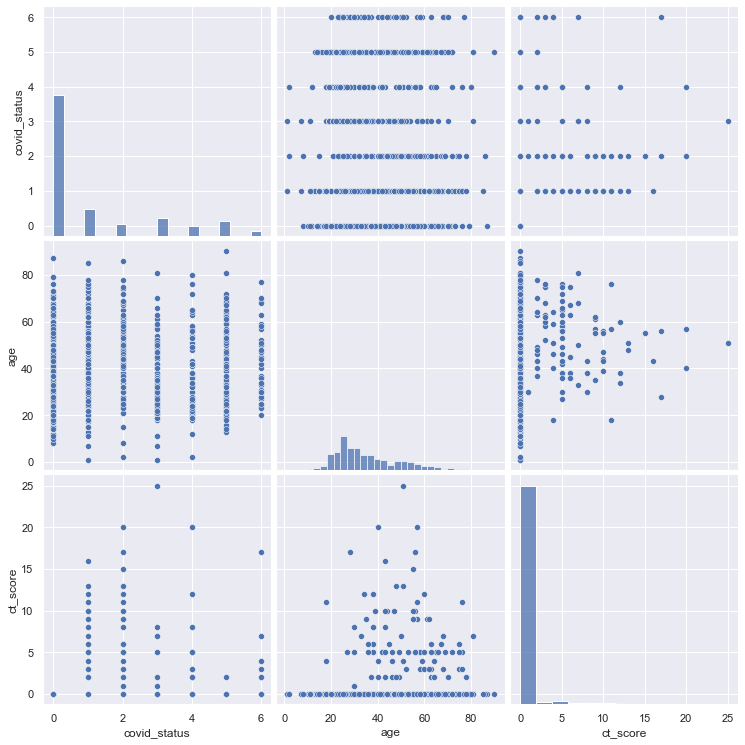

In [133]:
import seaborn as sns
sns.pairplot(df, vars=['covid_status', 'age', 'ct_score'], height=3.5)

<AxesSubplot:>

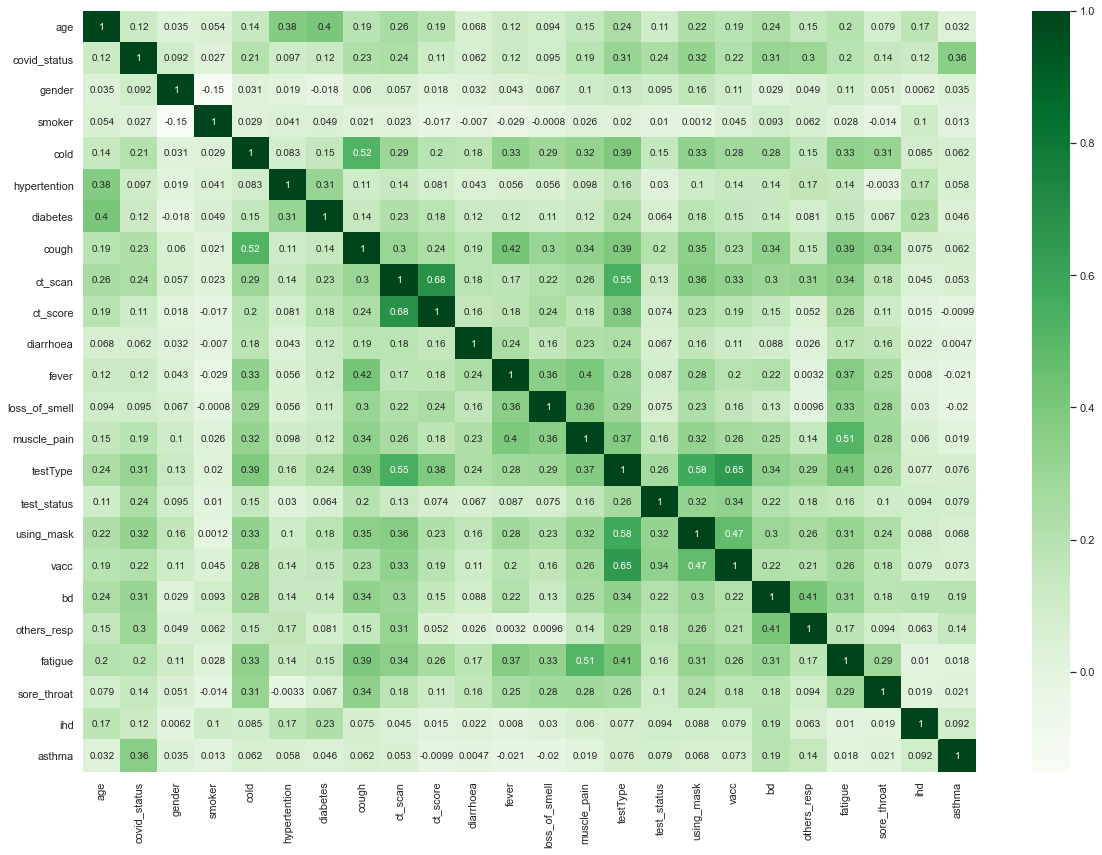

In [28]:
# корреляция
corr = df.corr()
import seaborn as sns
plt.figure(figsize=(20,14))
sns.heatmap(corr, cmap="Greens",annot=True)

In [29]:
corr[corr < 1].unstack().transpose()\
    .sort_values( ascending=False)\
    .drop_duplicates()

ct_score  ct_scan          0.682276
vacc      testType         0.647986
testType  using_mask       0.576959
ct_scan   testType         0.548816
cough     cold             0.520585
                             ...   
asthma    loss_of_smell   -0.020296
          fever           -0.020870
fever     smoker          -0.028982
gender    smoker          -0.150898
age       age                   NaN
Length: 277, dtype: float64

<AxesSubplot:xlabel='ct_score', ylabel='covid_status'>

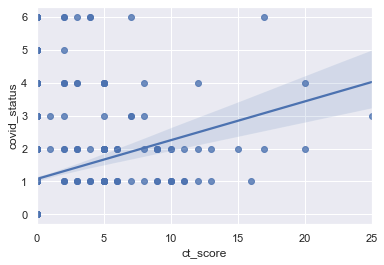

In [21]:
# линейная корреляция между процентом повреждения легких и статусом заболевания
import seaborn as sns
sns.regplot(x="ct_score", y="covid_status", data=df)

<AxesSubplot:xlabel='ct_score', ylabel='age'>

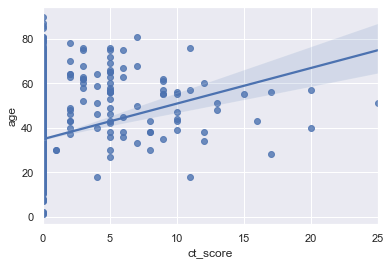

In [23]:
# линейная корреляция между возрастом и результатами КТ
import seaborn as sns
sns.regplot(x="ct_score", y="age", data=df)

covid_status    0   1   2   3   4   5   6
row_0                                    
0             393  57  10  58  34  32  16
1             151  33  26  24  11  17   8
2             242  45  19  23  14  29   7
3              22  26  17   3   6  15   4
4             160  22   5  18  12  18   1
5             318  45  12  40  11  19  11
6              93  33  29   8  11  21   4


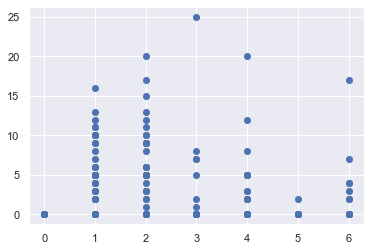

In [24]:
# кластеризация
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=7, random_state=1).fit(df)

labels = kmeans_model.labels_

print(pd.crosstab(labels, df["covid_status"]))
plt.scatter(df["covid_status"], df["ct_score"]);

In [32]:
# forward regression (метод наименьших квадратов)
import statsmodels.formula.api as sm
result = sm.ols(formula="covid_status ~ asthma + bd + using_mask + testType + ct_scan + cough + cold", data=df).fit()
print(result.params)
print(result.summary())

Intercept             0.634234
asthma[T.True]        2.439206
bd[T.True]            0.895203
using_mask[T.True]    0.750428
ct_scan[T.True]       0.385753
cough[T.True]         0.171179
cold[T.True]          0.134987
testType              0.399958
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           covid_status   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     112.1
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          4.37e-141
Time:                        14:53:25   Log-Likelihood:                -4065.9
No. Observations:                2233   AIC:                             8148.
Df Residuals:                    2225   BIC:                             8194.
Df Model:                           7                                         
Covariance Type:          

In [122]:
# нейросеть
# features_train, features_test, labels_train, labels_test
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = df
labels = data['covid_status']
features = data.drop(df.columns[1], axis=1)

X = features
y = np.ravel(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(22,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
                   
hist = model.fit(X_train, y_train, epochs=10, batch_size=22, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
447/447 [==============================] - 1s 821us/step - loss: 387680128.0000 - accuracy: 0.1271 - val_loss: 0.2053 - val_accuracy: 0.1007
Epoch 2/10
447/447 [==============================] - 0s 587us/step - loss: -0.1612 - accuracy: 0.1204 - val_loss: 0.0565 - val_accuracy: 0.1007
Epoch 3/10
447/447 [==============================] - 0s 619us/step - loss: -0.3290 - accuracy: 0.1204 - val_loss: -0.0128 - val_accuracy: 0.1007
Epoch 4/10
447/447 [==============================] - 0s 587us/step - loss: -0.4402 - accuracy: 0.1204 - val_loss: -0.0576 - val_accuracy: 0.1007
Epoch 5/10
447/447 [==============================] - 0s 582us/step - loss: -0.5313 - accuracy: 0.1204 - val_loss: -0.0932 - val_accuracy: 0.1007
Epoch 6/10
447/447 [==============================] - 0s 587us/step - loss: -0.6117 - accuracy: 0.1204 - val_loss: -0.1235 - val_accuracy: 0.1007
Epoch 7/10
447/447 [==============================] - 0s 664us/step - loss: -0.6875 - accuracy: 0.1204 - val_loss: -0.1

In [123]:
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

14/14 [==============================] - 0s 609us/step - loss: -0.2314 - accuracy: 0.1007
[-0.23135478794574738, 0.10067114233970642]


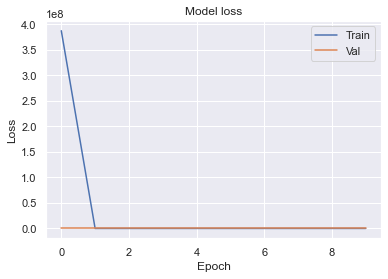

In [124]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

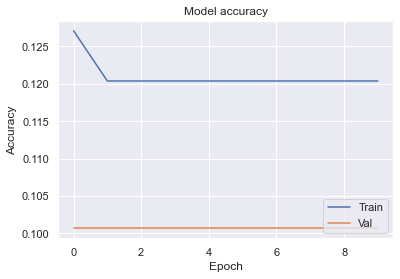

In [125]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [111]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(22,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, y_train,
          batch_size=32, epochs=10,
          validation_data=(X_test, y_test))

Epoch 1/10
56/56 [==============================] - 2s 27ms/step - loss: -77844.6406 - accuracy: 0.3242 - val_loss: -579207.0625 - val_accuracy: 0.5235
Epoch 2/10
56/56 [==============================] - 1s 24ms/step - loss: -16865058.0000 - accuracy: 0.3791 - val_loss: -63883392.0000 - val_accuracy: 0.1029
Epoch 3/10
56/56 [==============================] - 1s 24ms/step - loss: -437937248.0000 - accuracy: 0.3847 - val_loss: -976797824.0000 - val_accuracy: 0.1029
Epoch 4/10
56/56 [==============================] - 1s 23ms/step - loss: -3784853504.0000 - accuracy: 0.3835 - val_loss: -6470827520.0000 - val_accuracy: 0.1029
Epoch 5/10
56/56 [==============================] - 1s 24ms/step - loss: -17559087104.0000 - accuracy: 0.4037 - val_loss: -25677035520.0000 - val_accuracy: 0.5928
Epoch 6/10
56/56 [==============================] - 1s 25ms/step - loss: -57927553024.0000 - accuracy: 0.3981 - val_loss: -75304255488.0000 - val_accuracy: 0.1029
Epoch 7/10
56/56 [===========================

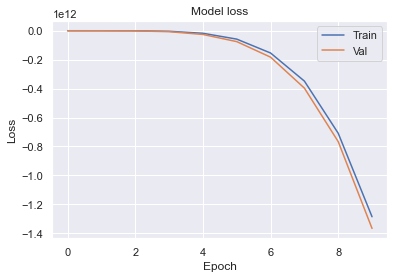

In [113]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

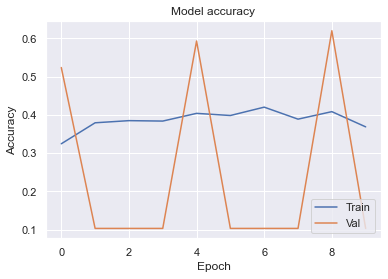

In [115]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()